In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.stats import skew, kurtosis, normaltest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
!mkdir -p ./data
!wget -O ./data/lead_scoring.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-12 18:16:47--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘./data/lead_scoring.csv’

./data/lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.002s  

2025-10-12 18:16:47 (34.8 MB/s) - ‘./data/lead_scoring.csv’ saved [80876/80876]



In [4]:
df = pd.read_csv('./data/lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [7]:
df[["converted"]]

,converted
0,1
1,0
2,1
3,0
4,1
...,...
1457,1
1458,1
1459,1
1460,1


In [ ]:
null_counts = df.isnull().sum()
print("Null counts per column:\n", null_counts)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

df[categorical_cols] = df[categorical_cols].fillna('NA')
df[numeric_cols] = df[numeric_cols].fillna(0.0)

Null counts per column:
 lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64
Categorical columns: ['lead_source', 'industry', 'employment_status', 'location']
Numeric columns: ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']


In [10]:
null_counts = df.isnull().sum()
null_counts

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1
What is the most frequent observation (mode) for the column industry?

In [12]:
df[["industry"]].mode()

,industry
0,retail


In [15]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


### Question 2
What are the two features that have the biggest correlation?

['number_of_courses_viewed', 'lead_score', 'annual_income', 'interaction_count']


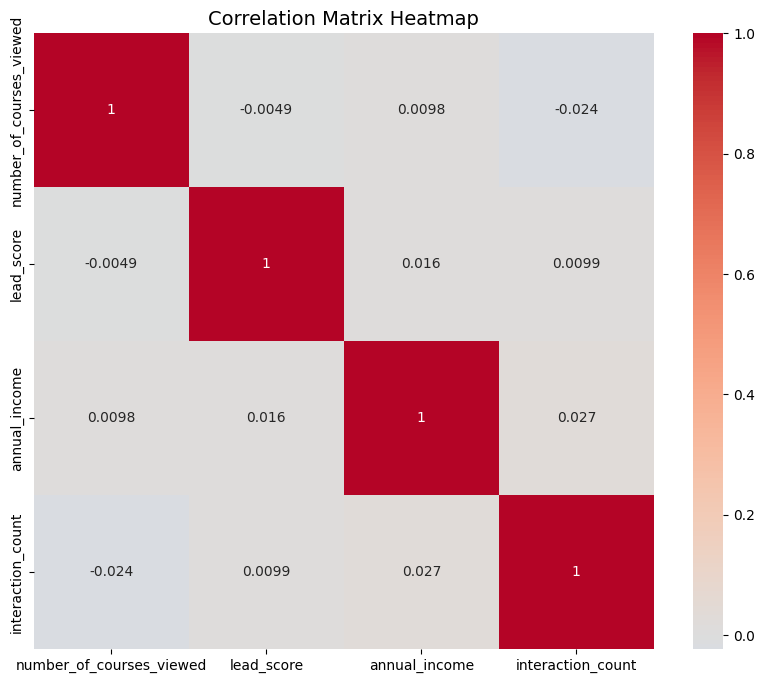

In [ ]:
x_numeric = df.select_dtypes(include=['number']).columns.tolist()
x_numeric = list(set(x_numeric) - {"converted"})
print(x_numeric)

correlation_matrix = df[x_numeric].corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix Heatmap', fontsize=14)

plt.show()


### Data Prep

In [23]:
x_columns = [col for col in df.columns if col != 'converted']
y_columns = ['converted']

x = df[x_columns]
y = df[y_columns[0]]

x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.4, random_state=42
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

### Question 3
Which of these variables has the biggest mutual information score?


In [25]:
from sklearn.metrics import mutual_info_score

mi_scores = {}
for col in categorical_cols:
    mi = mutual_info_score(x_train[col], y_train)
    mi_scores[col] = round(mi, 2)

mi_scores

{'lead_source': 0.03,
 'industry': 0.02,
 'employment_status': 0.02,
 'location': 0.0}

### Question 4
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [28]:
x_train_enc = pd.get_dummies(x_train, columns=categorical_cols)
x_val_enc = pd.get_dummies(x_val, columns=categorical_cols)

x_val_enc = x_val_enc.reindex(columns=x_train_enc.columns, fill_value=0)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(x_train_enc, y_train)

# Predict and calculate accuracy
y_pred = model.predict(x_val_enc)
accuracy = round(accuracy_score(y_val, y_pred), 2)
print("Validation accuracy:", accuracy)

Validation accuracy: 0.74


In [33]:


original_accuracy = accuracy_score(y_val, model.predict(x_val_enc))

features_to_test = ['industry', 'employment_status', 'lead_score']
diffs = {}

for feature in features_to_test:
    if feature in categorical_cols: # Handle categorical features
        feature_cols = [col for col in x_val_enc.columns if col.startswith(feature + '_')]
    else:
        feature_cols = [feature]

    print("Testing feature:", feature)
    print("Feature columns:", feature_cols)

    x_train_enc_drop = x_train_enc.drop(columns=feature_cols)
    x_val_enc_drop = x_val_enc.drop(columns=feature_cols)
    
    temp_model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    temp_model.fit(x_train_enc_drop, y_train)
    temp_pred = temp_model.predict(x_val_enc_drop)
    temp_acc = accuracy_score(y_val, temp_pred)
    
    diffs[feature] = original_accuracy - temp_acc

print(diffs)
least_useful = min(diffs, key=diffs.get)
least_useful

Testing feature: industry
Feature columns: ['industry_NA', 'industry_education', 'industry_finance', 'industry_healthcare', 'industry_manufacturing', 'industry_other', 'industry_retail', 'industry_technology']
Testing feature: employment_status
Feature columns: ['employment_status_NA', 'employment_status_employed', 'employment_status_self_employed', 'employment_status_student', 'employment_status_unemployed']
Testing feature: lead_score
Feature columns: ['lead_score']
{'industry': 0.0, 'employment_status': -0.003424657534246589, 'lead_score': 0.0}


'employment_status'

In [36]:
c_values = [0.01, 0.1, 1, 10, 100]
val_accuracies = {}

for c in c_values:
    reg_model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    reg_model.fit(x_train_enc, y_train)
    y_val_pred = reg_model.predict(x_val_enc)
    acc = round(accuracy_score(y_val, y_val_pred), 3)
    val_accuracies[c] = acc

best_c = max(val_accuracies, key=val_accuracies.get)
print(val_accuracies)
best_c

{0.01: 0.743, 0.1: 0.743, 1: 0.743, 10: 0.743, 100: 0.743}


0.01